<a href="https://colab.research.google.com/github/jamile-kellensouza/A-machine-learning-workflow-for-biomedical-tabular-data/blob/main/Supervised_Classification_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

!pip install xgboost
!pip install catboost
!pip install lightgbm

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, recall_score,
    f1_score, roc_auc_score, matthews_corrcoef,precision_score,
    classification_report,confusion_matrix

)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data input
df = pd.read_csv("/content/alzheimers_disease_data.csv")

cols_remover = ["PatientID", "DoctorInCharge"]

df = df.drop(columns=cols_remover)

target = "Diagnosis"

X = df.drop(columns=[target])
y = df[target]

print("Final format:", X.shape, "features")


Final format: (2149, 32) features


In [ ]:
# Separation of training and test files
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (1504, 32) Test: (645, 32)


In [ ]:
# modelos selecionados
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=2000))
    ]),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, kernel="rbf"))
    ]),

    "RandomForest": RandomForestClassifier(),


    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False
    ),

    "LightGBM": LGBMClassifier(    ),

    "CatBoost": CatBoostClassifier(
        verbose=0,
        eval_metric="Logloss"
    ),

    "AdaBoost": AdaBoostClassifier(),

    "HistGradientBoost": HistGradientBoostingClassifier()
}

In [ ]:
# Cross - validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")

    cv_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring={
            "bal_acc": "balanced_accuracy",
            "precision": "precision",
            "recall": "recall",
            "f1": "f1",
            "roc_auc": "roc_auc",
            "mcc": "matthews_corrcoef"
        },
        n_jobs=-1
    )

    scores[name] = {
        metric: f"{np.mean(values):.3f} ({np.std(values):.3f})"
        for metric, values in cv_results.items()
    }

    # Construção da tabela final
df_scores = pd.DataFrame(scores).T

print("\nRESULTS TABLE")
display(df_scores)



Training model: LogisticRegression

Training model: SVM

Training model: RandomForest

Training model: XGBoost

Training model: LightGBM

Training model: CatBoost

Training model: AdaBoost

Training model: HistGradientBoost

RESULTS TABLE


,fit_time,score_time,test_bal_acc,test_precision,test_recall,test_f1,test_roc_auc,test_mcc
LogisticRegression,0.037 (0.018),0.068 (0.025),0.810 (0.031),0.783 (0.057),0.733 (0.048),0.756 (0.042),0.898 (0.031),0.631 (0.064)
SVM,1.623 (0.377),0.151 (0.041),0.802 (0.029),0.792 (0.033),0.707 (0.054),0.746 (0.040),0.890 (0.023),0.622 (0.052)
RandomForest,1.765 (0.343),0.135 (0.048),0.916 (0.040),0.953 (0.020),0.855 (0.077),0.900 (0.048),0.953 (0.022),0.856 (0.065)
XGBoost,0.874 (0.291),0.097 (0.042),0.939 (0.026),0.947 (0.029),0.906 (0.049),0.925 (0.031),0.958 (0.021),0.888 (0.046)
LightGBM,0.459 (0.109),0.058 (0.019),0.941 (0.028),0.945 (0.023),0.911 (0.050),0.928 (0.034),0.953 (0.022),0.890 (0.049)
CatBoost,12.598 (0.337),0.032 (0.011),0.945 (0.025),0.951 (0.025),0.915 (0.042),0.933 (0.031),0.954 (0.022),0.898 (0.046)
AdaBoost,0.451 (0.014),0.058 (0.007),0.925 (0.030),0.914 (0.029),0.896 (0.056),0.904 (0.036),0.947 (0.023),0.854 (0.052)
HistGradientBoost,0.936 (0.227),0.044 (0.017),0.941 (0.026),0.949 (0.026),0.910 (0.046),0.928 (0.032),0.953 (0.021),0.892 (0.046)


In [ ]:
best_model_name = "CatBoost"   # best model
best_model = models[best_model_name]

best_model.fit(X_train, y_train)


===== METRICS =====
Balanced Accuracy: 0.945
Precision: 0.942
Recall: 0.921
F1: 0.931
AUC: 0.948
MCC: 0.894




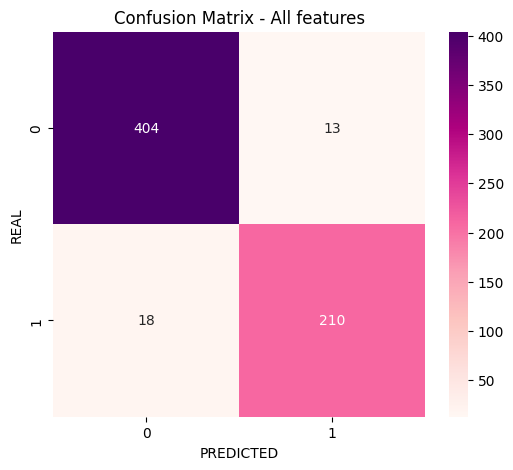

In [ ]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\n===== METRICS =====")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.3f}")

print("\n")
cm1 = confusion_matrix(y_test, y_pred)

# Figura 10 - A
plt.figure(figsize=(6,5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("PREDICTED")
plt.ylabel("REAL")
plt.title("Confusion Matrix - All features")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       417
           1       0.94      0.92      0.93       228

    accuracy                           0.95       645
   macro avg       0.95      0.94      0.95       645
weighted avg       0.95      0.95      0.95       645



In [ ]:
# feature importance
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({
        "feature": X_train.columns,
        "importance": importances
    }).sort_values("importance", ascending=False)

    print("FEATURE IMPORTANCE")
    display(feature_importance.reset_index(drop=True))

elif hasattr(best_model, "coef_"):
    coef = best_model.coef_[0]
    feature_importance = pd.DataFrame({
        "feature": X_train.columns,
        "coef": coef
    }).sort_values("coef", ascending=False)

    print("\FEATURE COEFFICIENTS")
    display(feature_importance.reset_index(drop=True))

else:
    print("The chosen model lacks a clear method for determining feature importance.")


FEATURE IMPORTANCE


<>:19: SyntaxWarning: invalid escape sequence '\F'
<>:19: SyntaxWarning: invalid escape sequence '\F'
/tmp/ipython-input-1964557215.py:19: SyntaxWarning: invalid escape sequence '\F'
  print("\FEATURE COEFFICIENTS")


,feature,importance
0,FunctionalAssessment,21.418757
1,ADL,18.764275
2,MMSE,15.223543
3,MemoryComplaints,13.614706
4,BehavioralProblems,9.646966
5,CholesterolTotal,2.027285
6,DietQuality,1.978157
7,Age,1.716229
8,AlcoholConsumption,1.704209
9,SleepQuality,1.611526


In [ ]:
# Feature selection
top_k = 5

top_features = feature_importance["feature"].head(top_k).tolist()

df_top = df[top_features + [target]]

df_top.to_csv("dataset_top_features.csv", index=False)

Retraining - Best model + feature selection

In [ ]:
# Data input
df = pd.read_csv("/content/dataset_top_features.csv")

# Label
target = "Diagnosis"

# Separate features and labels
X = df.drop(columns=[target])
y = df[target]

print("Final dataset:", X.shape)

Final dataset: (2149, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1504, 5) Test: (645, 5)


In [ ]:
best_model_name = "CatBoost"   # Retraining
best_model = models[best_model_name]

best_model.fit(X_train, y_train)

TESTE


METRICS
Balanced Accuracy: 0.949
Precision: 0.942
Recall: 0.930
F1: 0.936
AUC: 0.949
MCC: 0.901




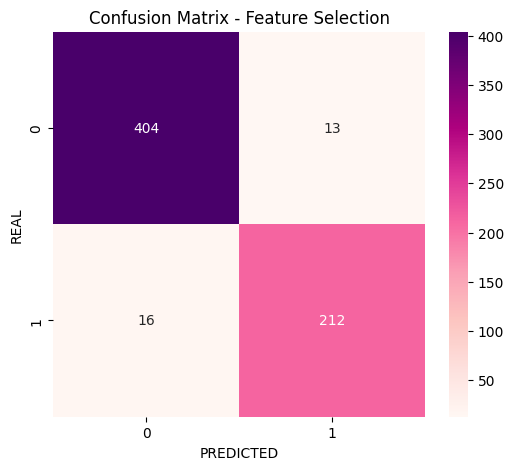

In [ ]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nMETRICS")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.3f}")

print("\n")
cm2 = confusion_matrix(y_test, y_pred)
#Figura 10 - B
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("PREDICTED")
plt.ylabel("REAL")
plt.title("Confusion Matrix - Feature Selection")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       417
           1       0.94      0.93      0.94       228

    accuracy                           0.96       645
   macro avg       0.95      0.95      0.95       645
weighted avg       0.95      0.96      0.95       645



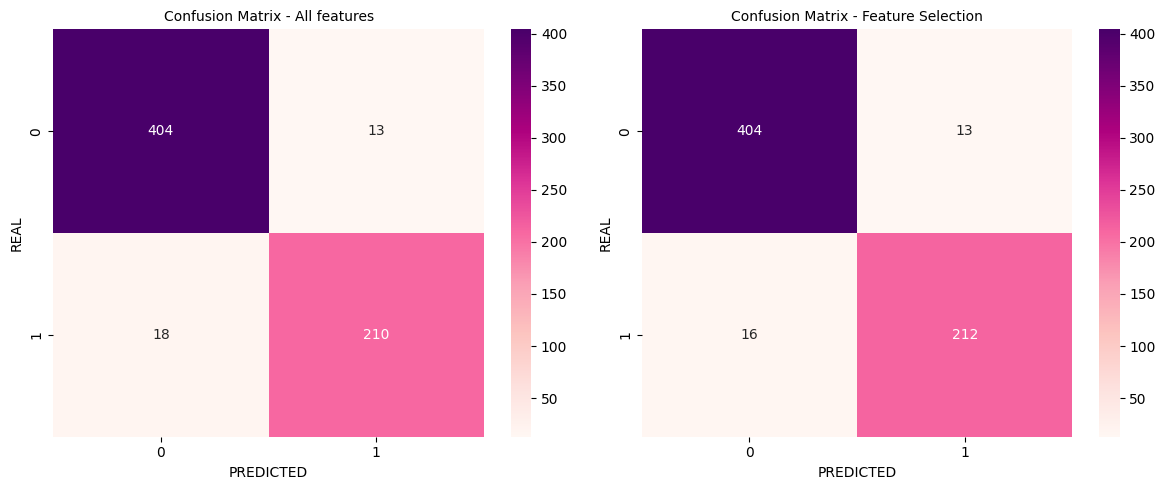

In [ ]:
plt.figure(figsize=(12, 5))

# Figura 10 - A
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("PREDICTED")
plt.ylabel("REAL")
plt.title("Confusion Matrix - All features", fontsize=10)

# Figura 10 - B
plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("PREDICTED")
plt.ylabel("REAL")
plt.title("Confusion Matrix - Feature Selection", fontsize=10)

plt.tight_layout()
plt.show()
